
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment you will be able to :

-  extract and visualize features for one audio sample.
-  use extracted features to classify them into 30 different classes


**NOTE:** The number of unique classes chosen here is 30 out of 35. Further, you are encouraged to use different types of classifiers (within SkLearn if you like). Also, try to use sklearn's joblib to save your model (and observe the size of your various ML models). Saving a model is an important step, especially if you wish to export it to another machine/device where you'd like to run your ML algorithm.

In [ ]:
#@title Experiment Walkthrough Video
from IPython.display import HTML

HTML("""<video width="800" height="600" controls>
  <source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/Feb10/mfcc_new.mp4" type="video/mp4">
</video>
""")

## Dataset

### Description

In this experiment we will use TensorFlow’s Speech Commands Datasets which includes 1lakh+ samples in which each sample is a one-second-long utterance of 30 short commands. This dataset has been curated using thousands of people and is opensource under a Creative Commons BY 4.0 license.

Example commands: 'Yes', 'No', 'Up', 'Down', 'Left', etc.


## Domain Information

When we listen to an audio sample it changes constantly. This means that speech is non-stationary signal. Therefore, normal signal processing techniques cannot be applied to get features from audio. However, if the speech signal is observed using a very small duration window, the speech content in that small duration appears to be  stationary. That brought in the concept of short-time processing of speech. 

MFCC is a technique for short-time processing of speech. 

**Note: While it is a bonus to understand 'how' a speech signal is converted to a 'representation' by MFCC (or other similar speech processing techniques), it is not mandatory to understand the same. It is sufficient to realize that you're generating a unique numeric representation (a set of numbers) of a speech signal and that this unique representation helps you run your machine learning algorithms over the samples.**

## AIML Technique

In this short-time processing technique MFCC, a small duration window (say 25 milli sec) is considered for processing of the audio samples at a time. This small duration is called a frame. Now, for each of the frames, MFCC features are computed which gives a compact representation of the audio samples. A spectrogram is computed for audio samples which gives a heat map of frequencies vs time from the series of spectral vectors generated from audio samples.

This representation is obtained by keeping in mind that humans are much better at grasping small changes in the audio at low frequencies than audio at high frequencies. So mel-scale converts high frequencies to human graspable frequencies. 

### Setup Steps

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U2W11_20_MFCC_B" #name of the notebook

def setup(): 
    ipython.magic("sx pip install librosa") 
    ipython.magic("sx wget  https://cdn.talentsprint.com/aiml/Experiment_related_data/week3/Exp1/AIML_DS_5E1B34A6_NOHASH_0_STD.wav")
    ipython.magic("sx mv AIML_DS_5E1B34A6_NOHASH_0_STD.wav?dl=1 AIML_DS_5E1B34A6_NOHASH_0_STD.wav")
    ipython.magic("sx wget  https://cdn.talentsprint.com/aiml/Experiment_related_data/week3/Exp1/AIML_DS_AUDIO_STD.zip")
    ipython.magic("sx unzip AIML_DS_AUDIO_STD.zip")
    ipython.magic("sx wget  https://cdn.talentsprint.com/aiml/Experiment_related_data/week3/Exp1/MFCC_Utils.py")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages


In [ ]:
# Importing required packages
import os

import warnings
warnings.filterwarnings("ignore")

# Math
import numpy as np
from scipy import signal
from scipy.io import wavfile
import librosa

# Visualization
import matplotlib.pyplot as plt
import librosa.display

from MFCC_Utils import *

In [ ]:
unique_classes = np.array(['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy',
                           'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven',
                           'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero'])

In [ ]:
len(unique_classes)

30

## 1. MFCC features

Let us read a single sample audio file (.wav) from the dataset:

Note: Refer [wavfile.read](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html) from scipy

In [ ]:
filename = 'AIML_DS_5E1B34A6_NOHASH_0_STD.wav'
sample_rate, samples = wavfile.read(str(filename)) # YOUR CODE HERE: Use 'wavefile' function to read the 'filename' above. 

In [ ]:
samples = samples.astype('float16')
print(samples)

[-14. -22. -20. ...  21.  15.  12.]


###  1.1. Amplitude

Speech is a temporal signal, where the amplitude of the signal varies with time.

The amplitude v/s time graph of the audio file we read is:

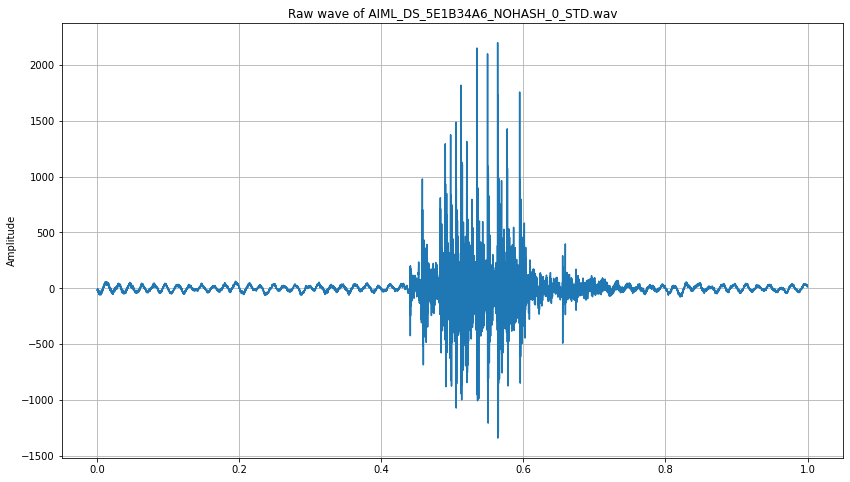

In [ ]:
fig = plt.figure(figsize=(14, 8))
plt.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)
plt.gca().set_title('Raw wave of ' + filename)
plt.gca().set_ylabel('Amplitude')
plt.grid("on")

### 1.2 Log Spectrogram

The same speech signal could be interpreted as made up of several frequencies of waves. A visualization of the power, i.e. energy per unit time in each frequency v/s time is called the Spectrogram.

Usually, the log of this energy is considered a better parameter. This is because the power in sound is synonymous with volume (loudness) of the sound, and the human ears are more sensitive to smaller volumes than larger volumes. So it is more convenient to observe the log of the volume rather than the volume itself. The log of sound power is measured in deciBels (dB). (You might be familiar with dB as a unit of sound volume). Hence, we shall consider the Log Spectrogram instead of just the spectrogram.

Let us compute the Log Spectrogram of the audio file we read:

Note: Refer [signal.spectogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html) from scipy

In [ ]:
def log_specgram(audio, sample_rate, window_size=20, step_size=10, eps=1e-10):
    
    # Number of samples per window/segment
    nperseg = int(round(window_size * sample_rate / 1e3))
    
    # Number of overlapping samples
    noverlap = int(round(step_size * sample_rate / 1e3))
    
    # Compute the spectrogram
    freqs, times, spec = signal.spectrogram(audio,
                                            fs=sample_rate,
                                            window='hann',
                                            nperseg=nperseg,
                                            noverlap=noverlap,
                                            detrend=False)# Explore the 'signal.spectrogram' method in 
                                            #the documentation given
                         # ..and come up with appropriate params for the method.
    
    # Return log of the spectrogram values, with time axis in columns and frequencies in rows
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [ ]:
# Call the log specgram function
freqs, times, spectrogram = log_specgram(samples, sample_rate)

Let us plot the log spectrogram:

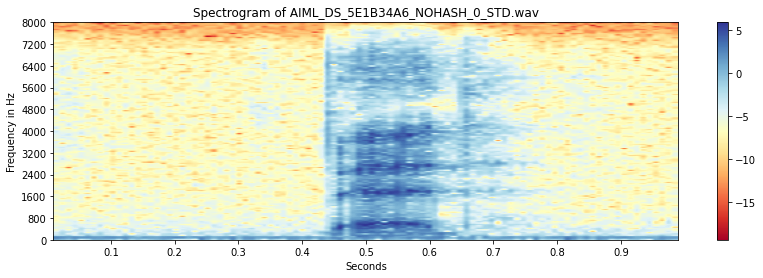

In [ ]:
fig = plt.figure(figsize=(14, 4))
plt.imshow(spectrogram.T, aspect='auto', origin='lower', cmap = plt.cm.RdYlBu,
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
plt.gca().set_yticks(freqs[::16])
plt.gca().set_xticks(times[9::10])
plt.gca().set_title('Spectrogram of ' + filename)
plt.gca().set_ylabel('Frequency in Hz')
plt.gca().set_xlabel('Seconds')
plt.colorbar()

As can be seen from the amplitude v/s time graph, the command is being uttered between 0.4 seconds and 0.6 seconds.

As can be seen from the spectrogram, the command is composed more of lower frequencies than higher frequencies. The rest of the time when there is no speech, each frequency has an equal contribution to the sound. This is called "White Noise".

Notice that the range of frequencies we are observing in the spectrogram is the linear scale between 0 Hz and 8000 Hz.

### 1.3. Mel Spectrogram

Human ears tend to listen to sounds on the log scale. That means, at lower frequencies we can detect small changes, but at higher frequencies our ears become less sensitive to small changes. For example, the difference between 10 Hz and 20 Hz would sound almost the same to us as that between 1000 Hz and 2000 Hz. To observe this logarithmic change, the frequency scale is modified into the ["mel frequency" scale](https://en.wikipedia.org/wiki/Mel_scale).

Let us compute the Mel Spectrogram using a convenient function in the `librosa` library in Python:

**Note:** Refer to [librosa.feature.melspectogram](https://librosa.org/doc/latest/generated/librosa.feature.melspectrogram.html) here

In [ ]:
# From this tutorial
# https://github.com/librosa/librosa/blob/master/examples/LibROSA%20demo.ipynb

S = librosa.feature.melspectrogram(samples, sr=sample_rate, hop_length=int(0.020*sample_rate), n_mels=128)
# YOUR CODE HERE: Explore the librosa.feature.melspectrogram and come up appropriate params to call here for the input 'samples' from above
print(S.shape)

(128, 51)


As mentioned before, the log of the spectrogram is a better parameter to observe rather than the spectrogram itself. Let us compute this using another convenient function in the `librosa` library:

In [ ]:
# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

Let's plot the log Mel spectrogam with the y-axis having frequenies in the mel scale instead of the linear scale: 

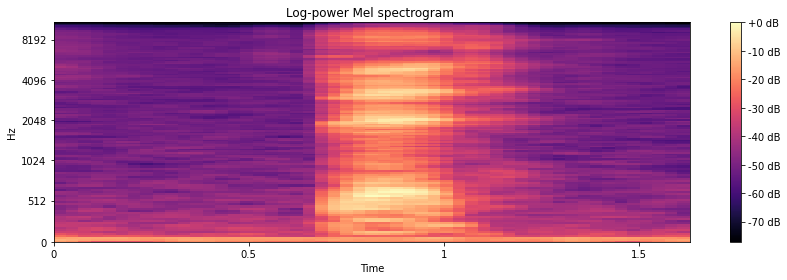

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Log-power Mel spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

Observe that the frequencies in the y-axis are not linear in scale. 

### 1.4 Mel Frequency Cepstral Coefficients (MFCCs)

Next, "Cepstral Coefficients" are important numbers that describe speech information in audio. By computing these Cepstral Coefficients in the mel scale, we shall obtain Mel Frequency Cepstral Coefficients.

For technical details, the procedure to compute MFCCs is:

- Take the Discrete Fourier Transform on every sliding window over the audio with some overlap.
- Apply `n_mels` triangular Mel-scale filters onto the Fourier power spectrum, and apply logarithm to the outputs.
- Apply the Discrete Cosine Transform, and reduce dimensionality to `n_mfcc` dimensions.

Let's use a convenient library function called `librosa.feature.mfcc` to compute MFCCs from the spectrogram:

Note: Refere to [librosa.feature.mfcc](https://librosa.org/doc/latest/generated/librosa.feature.mfcc.html) here

In [ ]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
# YOUR CODE HERE: Explore the librosa.feature.mfcc method and pass appropriate params (for the input los_S you got from above)
print(mfcc.shape)

(13, 51)


Let us plot the MFCCs:

**Note:** Refer to [librosa.display.specshow](https://librosa.org/doc/latest/generated/librosa.display.specshow.html)

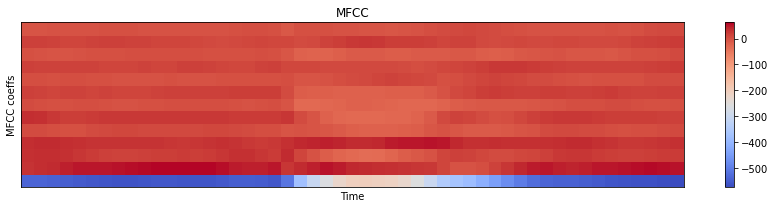

In [ ]:
plt.figure(figsize=(12, 3))
librosa.display.specshow(mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

### 1.5 Delta MFCCs

MFCCs as such are quite powerful features, but even better features are their first-order and second-order derivatives.

Let's use a convenient library function called `librosa.feature.mfcc` to compute the second-order delta MFCCs:

In [ ]:
# Find 1st order delta_mfcc
delta1_mfcc = librosa.feature.delta(mfcc, order=1)

# Find 2nd order delta_mfcc
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

Let's plot the 2nd order delta MFCCs:

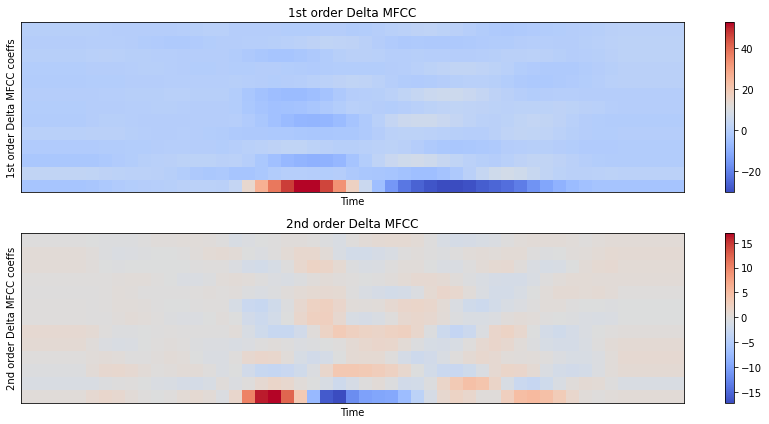

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(211)
librosa.display.specshow(delta1_mfcc)
plt.ylabel('1st order Delta MFCC coeffs')
plt.xlabel('Time')
plt.title('1st order Delta MFCC')
plt.colorbar()
plt.tight_layout()

plt.subplot(212)
librosa.display.specshow(delta2_mfcc)
plt.ylabel('2nd order Delta MFCC coeffs')
plt.xlabel('Time')
plt.title('2nd order Delta MFCC')
plt.colorbar()
plt.tight_layout()

## 2. Load the Dataset

The dataset is of ~10GB in size and operating directly on it will take a lot of time, therefore we have included that as a Homework Exercise for those who are interested to go into that detail.
Our team has instead precomputed the features which can be loaded directly and computed on.

Dataset is available to download using the below link: <br>[http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz ](http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz)


## 3. Load MFCC features

NOTE: For the rest of this experiment assume that the term Validation (short name: val) is the same as 'Test' dataset.
Later on in the course you will appreciate the significance of a three way split, i.e. train, val and test. But in this 
 experiment we have two-way Train/Val(same as test) split

**Note:** Refer to [sio.loadmat](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html)

In [ ]:
### Load MFCC Features
import scipy.io as sio
saved_vars = sio.loadmat('AIML_DS_AUDIO_STD/mfcc_feats/tf_speech_mfcc_31st_jan18.mat')
# print(saved_vars.keys())

mfcc_features_train = saved_vars['mfcc_features_train']
mfcc_labels_train = saved_vars['mfcc_labels_train']

mfcc_features_val = saved_vars['mfcc_features_val']
mfcc_labels_val = saved_vars['mfcc_labels_val']
print(mfcc_features_train.shape,mfcc_features_val.shape)

(57923, 416) (6798, 416)


In [ ]:
mfcc_labels_train.shape, mfcc_labels_val.shape

((57923, 1), (6798, 1))

## 4. Load Deep Features

These features were trained on the same MFCC Features above using a Deeper Neural network, thus helping us to understand in extracting better features for representing the data. This helps in improving the accuracy

In [ ]:
deep_features_train = np.squeeze(np.load('AIML_DS_AUDIO_STD/deep_feats/train_set.npz'))
deep_labels_train = np.load('AIML_DS_AUDIO_STD/deep_feats/train_labs.npz')
deep_features_val = np.squeeze(np.load('AIML_DS_AUDIO_STD/deep_feats/validation_set.npz'))
deep_labels_val = np.load('AIML_DS_AUDIO_STD/deep_feats/validation_labs.npz')
print(deep_features_train.shape, deep_features_val.shape)

(63715, 4096) (7477, 4096)


In [ ]:
#deep_features_train = deep_features_train.reshape(-1)
#deep_labels_train = deep_labels_train.reshape(-1)

deep_labels_train = deep_labels_train.reshape(-1,1)
deep_labels_val = deep_labels_val.reshape(-1,1)

In [ ]:
deep_labels_train.shape, deep_labels_val.shape, deep_features_train.shape, deep_labels_train.shape

((63715, 1), (7477, 1), (63715, 4096), (63715, 1))

## 5. Validation (in this case, synonymous with Test)

We want to choose the best model for speech classification among:

- kNN classifier with MFCC features

- kNN classifier with Deep features


To do that, let's find the validation accuracies of each method using MFCC features and deep features.

We shall use our familiar convenient function to choose an algorithm, train on training features and labels as inputs, and obtain accuracy on given features and labels.

### 5.1. kNN Classifier

We want to choose the value of $k$ based on validation accuracy. Choose $k$ among 1, 3, 7, 9, 11, 15.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
values_of_k = [1, 3, 7, 9, 11, 15]

### 5.1.1. kNN with MFCC features

**Ungraded Exercise 1: Find the best $k$ using validation accuracy on MFCC features**

**Note : Use 5000 samples of mfcc_features_train for training  and 1000 samples of mfcc_features_val for validation**

In [ ]:
X_train = mfcc_features_train[:5000, :]
y_train = mfcc_labels_train[:5000]
X_val = mfcc_features_val[:1000, :]
y_val = mfcc_labels_val[:1000]

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((5000, 416), (5000, 1), (1000, 416), (1000, 1))

In [ ]:
mfcc_features_train = mfcc_features_train[0:5000,:]
print(mfcc_features_train.shape)
mfcc_labels_train = mfcc_labels_train[0:5000,:]
print(mfcc_labels_train.shape)


mfcc_features_val = mfcc_features_val[0:1000,:]
print(mfcc_features_val.shape)
mfcc_labels_val = mfcc_labels_val[0:1000,:]
print(mfcc_labels_val.shape)

(5000, 416)
(5000, 1)
(1000, 416)
(1000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
k = 3

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=k)

In [ ]:
neigh.fit(mfcc_features_train, mfcc_labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
neigh.score(mfcc_features_val, mfcc_labels_val)

0.583

### 5.1.2. kNN with Deep features


**Ungraded Exercise 2: Find the best $k$ using validation accuracy on Deep features**


**Note : Use 5000 samples of deep_features_train for training  and 1000 samples of deep_features_val for validation**

In [ ]:
X_train = deep_features_train[:5000,:]
y_train = deep_labels_train[:5000]
X_val = deep_features_val[:1000, :]
y_val = deep_labels_val[:1000]


In [ ]:
X_train.shape

(5000, 4096)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=k)

In [ ]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
neigh.score(X_val, y_val)

0.963

**Ungraded Exercise 3:** Try various other ML models that you know of to compare the accuracies 

In [ ]:
from sklearn.ensemble import RandomForestClassifier  
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = rfc.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [2. 2.]
 [0. 3.]
 ...
 [0. 0.]
 [1. 1.]
 [1. 1.]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[335   9  24   0]
 [ 38 334  11   1]
 [ 22   3 388   0]
 [ 17  10  15  43]]


0.88

**Ungraded Exercise 4:** Use the following [link](https://scikit-learn.org/stable/modules/model_persistence.html) to see how to use joblib, and try saving and loading your different ML models using the example provided there. Also try observing the size of the ML models that you saved. Here is another good article on saving and loading models using sklearn [link](https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/)

In [ ]:
from joblib import dump, load
dump(rfc, 'RandomForset.joblib') 

['RandomForset.joblib']

In [ ]:
rfc = load('RandomForset.joblib') 

### Please answer the questions below to complete the experiment:


In [ ]:
#@title The Deep features used above, has absolutely no relation to the MFCC Features (reading the comments/explanations above should help)? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "False" #@param ["","True", "False"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "non" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 9879
Date of submission:  20 Nov 2020
Time of submission:  06:36:21
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
